## When would we use logistic regression?

Logistic regression can be used if the dependent variable is categorical (e.g. a binary 0 or 1). If the dependent variable is continuous, then linear regression can be used to predict a scalar value.

#### The first question that comes to mind is -- why can't we just use linear regression and use the y value as a probability?

Let's try this out with a linear regression model to see why.

$$h_{\theta}(x) = \theta^{T} X$$

First, let's import some categorical data. Again, I'm using data from Andrew Ng's course --
http://openclassroom.stanford.edu/MainFolder/DocumentPage.php?course=MachineLearning&doc=exercises/ex4/ex4.html

The features are scores from 2 exams taken by 80 high school students. The dependent variable is whether the student was accepted into a university or not.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
%matplotlib inline

import seaborn as sns 
sns.set_context('talk')
sns.set_style('darkgrid')

In [32]:
exam_scores_df = pd.read_table('exam_scores.dat', header=None, sep='\s+')
exam_scores_df.columns = ['exam_one', 'exam_two']
admitted_df = pd.read_table('admitted.dat', header=None, sep='\s+')
admitted_df.columns = ['admitted']

In [33]:
df = exam_scores_df.join(admitted_df)

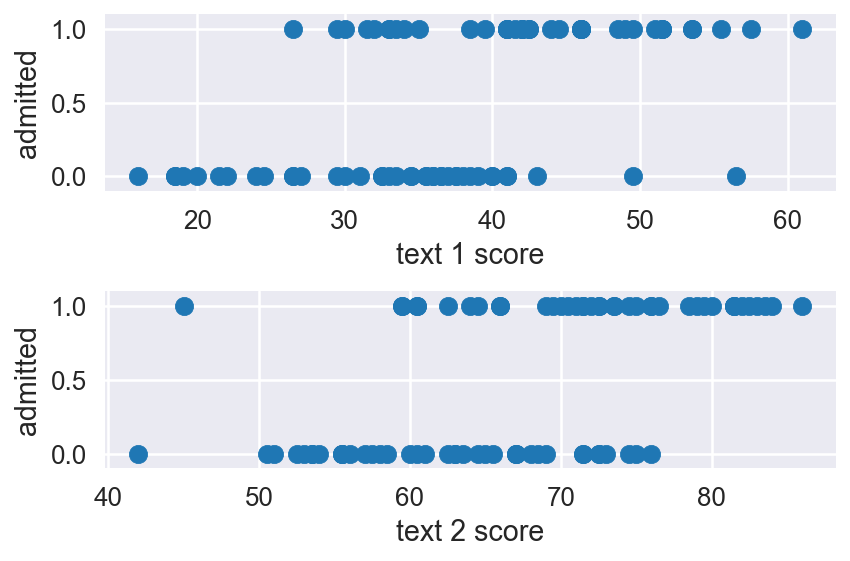

In [39]:
plt.subplot(211)
plt.scatter(df.exam_one, df.admitted)
plt.xlabel('text 1 score')
plt.ylabel('admitted')
plt.subplot(212)
plt.scatter(df.exam_two, df.admitted)
plt.xlabel('text 2 score')
plt.ylabel('admitted')
plt.tight_layout()
plt.show()

In [333]:
def hypothesis(thetas, xs):
    return np.dot(thetas, xs)

def cost_function(thetas, xs, ys):
    m = len(xs)
    return (1 / (2 * m)) * sum((np.array(ys) - hypothesis(thetas, xs))**2)

def gradient_descent_update(thetas, xs, ys):
    learning_rate = 0.000001
    m = len(xs)
    new_thetas = np.empty(len(thetas))
    for j, theta in enumerate(thetas):
        new_thetas[j] = theta - (learning_rate * (1 / m) * sum((hypothesis(thetas, xs) - ys) * xs[j]))
    return new_thetas

def minimize(*args, **kwargs):
    ys = kwargs['ys']
    xs = [np.ones(len(ys))]
    for arg in args:
        xs.append(arg)
    xs = np.array(xs)
    costs = []
    input_thetas = kwargs.get('thetas')
    thetas = input_thetas if input_thetas is not None else np.zeros(len(xs))
    for i in range(100):
        costs.append(cost_function(thetas, xs, ys))
        thetas = gradient_descent_update(thetas, xs, ys)
    return {'costs': costs, 'thetas': thetas}

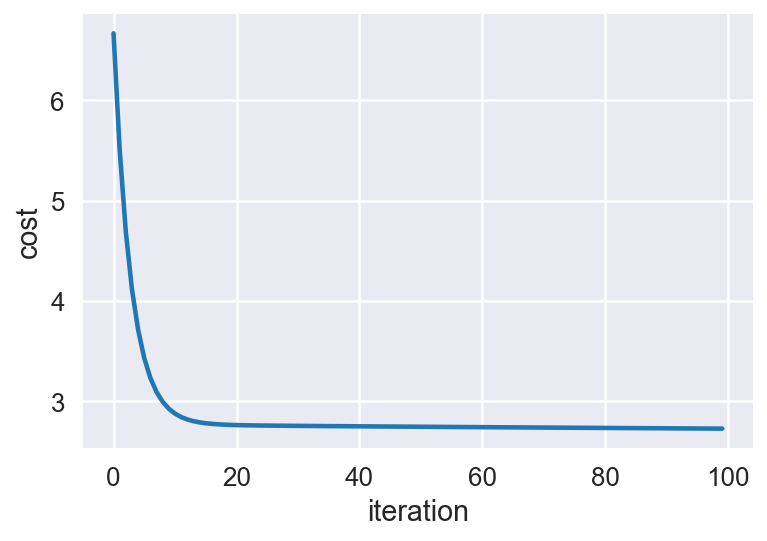

In [334]:
exam_one_xs, exam_two_xs, ys = df.values.T
result = minimize(exam_one_xs, exam_two_xs, ys=ys)
plt.plot(result['costs'])
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

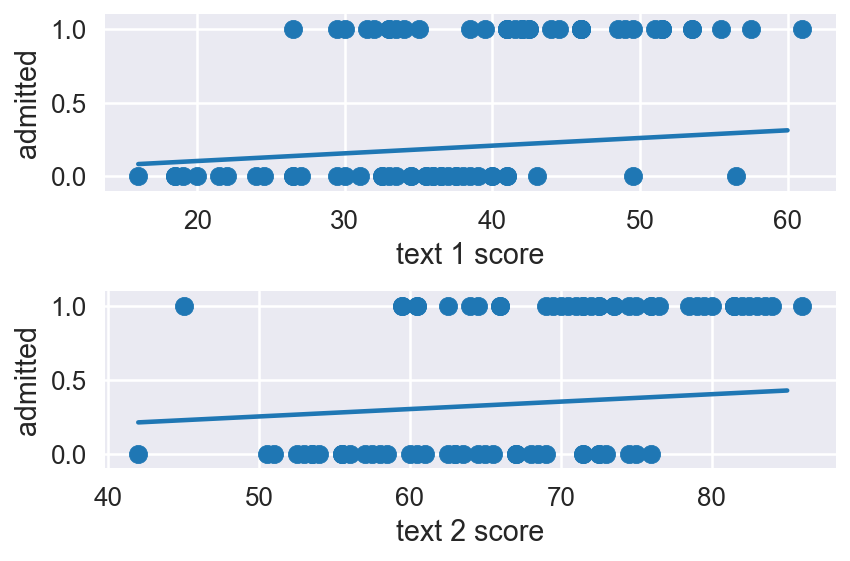

In [335]:
plt.subplot(211)
plt.scatter(x=df.exam_one, y=df.admitted)
line_xs = range(int(df.exam_one.min()), int(df.exam_one.max()))
line_ys = [((x*result['thetas'][1]) + result['thetas'][0]) for x in line_xs]
plt.plot(line_xs, line_ys)
plt.xlabel('text 1 score')
plt.ylabel('admitted')

plt.subplot(212)
plt.scatter(x=df.exam_two, y=df.admitted)
line_xs = range(int(df.exam_two.min()), int(df.exam_two.max()))
line_ys = [((x*result['thetas'][2]) + result['thetas'][0]) for x in line_xs]
plt.plot(line_xs, line_ys)
plt.xlabel('text 2 score')
plt.ylabel('admitted')
plt.tight_layout()
plt.show()

There are a few problems with this approach. Here, $y$ does not truly correspond to a probability of successfully being admitted (neither value is > 0.5 within this range). It is also possible for $y$ to span values outside of $[0, 1]$, which also would also make $y$ uninterpretable at a probability.

## Enter the generalized linear model

